<a href="https://colab.research.google.com/github/sargyri/Drop_Lev/blob/master/Machine_learning/Theory_experiment_mix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2018 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Lev Droplet 

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/basic_regression"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/r2.0rc/site/en/tutorials/keras/basic_regression.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/r2.0rc/site/en/tutorials/keras/basic_regression.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

Determination of ST by NN using coords (rho,theta, volume, volt)

In [ ]:
# Use seaborn for pairplot
#!pip install seaborn
#!pip install talos
#!pip install -q  --no-deps tensorflow-addons~=0.7

In [1]:
# !pip install lmfit
!pip install tensorflow_addons

     |████████████████████████████████| 706kB 11.1MB/s 


In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib
import pprint
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.callbacks import ModelCheckpoint

import tensorflow_addons as tfa

print(tf.__version__)


Instructions for updating:
non-resource variables are not supported in the long term
2.4.1


Run the next code box only if google drive is not mounted to colab

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


If it **is** mounted continue from here on

Check the connection at google's **GPU**

In [4]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


**Or** check the connection at google's **TPU**

In [ ]:
if 'COLAB_TPU_ADDR' not in os.environ:
  print('ERROR: Not connected to a TPU runtime; please see the first cell in this notebook for instructions!')
else:
  tpu_address = 'grpc://' + os.environ['COLAB_TPU_ADDR']
  print ('TPU address is', tpu_address)

  with tf.Session(tpu_address) as session:
    devices = session.list_devices()
    
  print('TPU devices:')
  pprint.pprint(devices)

### Get the data
First download the dataset!

**Option 1**: Upload files

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
csvfilename=str('TritonX100_conci_0.0100_all.csv')
input = pd.read_csv(io.BytesIO(uploaded[csvfilename]))
#input = pd.read_csv(csvfilename, sep="\t")
# Dataset is now stored in a Pandas Dataframe
input.shape

**Option 2**: Import files from drive

In [2]:
#From the drive folder that is mounted to collab go to the file that you are interested in, 
#right click and copy the path of the file. Paste it in csvfilename:
path=str('/content/drive/My Drive/DropLev/Levitator_2/Training/')

fileSDS1=pd.read_csv(str(path+'SDS/SDS_conci_0.01054_all.csv'), sep="\t")
fileSDS2=pd.read_csv(str(path+'SDS/SDS_conci_0.02108_all.csv'), sep='\t')
fileSDS3=pd.read_csv(str(path+'SDS/SDS_conci_0.04273_all.csv'), sep='\t')
fileSDS4=pd.read_csv(str(path+'SDS/SDS_conci_0.08828_all.csv'), sep="\t")
fileSDS5=pd.read_csv(str(path+'SDS/SDS_conci_0.25000_all.csv'), sep="\t")
fileSDS6=pd.read_csv(str(path+'SDS/SDS_conci_0.50000_all.csv'), sep="\t")
fileSDS7=pd.read_csv(str(path+'SDS/SDS_conci_0.75000_all.csv'), sep="\t")
fileSDS8=pd.read_csv(str(path+'SDS/SDS_conci_1.00000_all.csv'), sep="\t")
fileSDS9=pd.read_csv(str(path+'SDS/SDS_conci_1.25000_all.csv'), sep="\t")
fileSDS10=pd.read_csv(str(path+'SDS/SDS_conci_1.50000_all.csv'), sep="\t")
fileSDS11=pd.read_csv(str(path+'SDS/SDS_conci_2.00000_all.csv'), sep="\t")
fileSDS12=pd.read_csv(str(path+'SDS/SDS_conci_2.50000_all.csv'), sep="\t")
fileSDS13=pd.read_csv(str(path+'SDS/SDS_conci_3.00000_all.csv'), sep="\t")
fileSDS14=pd.read_csv(str(path+'SDS/SDS_conci_3.50000_all.csv'), sep="\t")
fileSDS15=pd.read_csv(str(path+'SDS/SDS_conci_4.00000_all.csv'), sep="\t")
fileSDS16=pd.read_csv(str(path+'SDS/SDS_conci_4.50000_all.csv'), sep="\t")
fileSDS17=pd.read_csv(str(path+'SDS/SDS_conci_5.50000_all.csv'), sep="\t")
fileSDS18=pd.read_csv(str(path+'SDS/SDS_conci_6.50000_all.csv'), sep="\t")
fileSDS19=pd.read_csv(str(path+'SDS/SDS_conci_7.50000_all.csv'), sep="\t")
fileSDS20=pd.read_csv(str(path+'SDS/SDS_conci_8.50000_all.csv'), sep="\t")
fileSDS21=pd.read_csv(str(path+'SDS/SDS_conci_24.75900_all.csv'), sep="\t")

fileTrit1=pd.read_csv(str(path+'TritonX100/TritonX_conci_0.00250_all.csv'), sep="\t")
fileTrit2=pd.read_csv(str(path+'TritonX100/TritonX_conci_0.00500_all.csv'), sep="\t")
fileTrit3=pd.read_csv(str(path+'TritonX100/TritonX_conci_0.00750_all.csv'), sep="\t")
fileTrit4=pd.read_csv(str(path+'TritonX100/TritonX_conci_0.01000_all.csv'), sep="\t")
fileTrit5=pd.read_csv(str(path+'TritonX100/TritonX_conci_0.01500_all.csv'), sep="\t")
fileTrit6=pd.read_csv(str(path+'TritonX100/TritonX_conci_0.02000_all.csv'), sep="\t")
fileTrit7=pd.read_csv(str(path+'TritonX100/TritonX_conci_0.02500_all.csv'), sep="\t")
fileTrit8=pd.read_csv(str(path+'TritonX100/TritonX_conci_0.03500_all.csv'), sep="\t")
fileTrit9=pd.read_csv(str(path+'TritonX100/TritonX_conci_0.05000_all.csv'), sep="\t")
fileTrit10=pd.read_csv(str(path+'TritonX100/TritonX_conci_0.07500_all.csv'), sep="\t")
fileTrit11=pd.read_csv(str(path+'TritonX100/TritonX_conci_0.10000_all.csv'), sep="\t")
fileTrit12=pd.read_csv(str(path+'TritonX100/TritonX_conci_0.12500_all.csv'), sep="\t")
fileTrit13=pd.read_csv(str(path+'TritonX100/TritonX_conci_0.15000_all.csv'), sep="\t")
fileTrit14=pd.read_csv(str(path+'TritonX100/TritonX_conci_0.17500_all.csv'), sep="\t")
fileTrit15=pd.read_csv(str(path+'TritonX100/TritonX_conci_0.20000_all.csv'), sep="\t")
fileTrit16=pd.read_csv(str(path+'TritonX100/TritonX_conci_0.25000_all.csv'), sep="\t")
fileTrit17=pd.read_csv(str(path+'TritonX100/TritonX_conci_0.30000_all.csv'), sep="\t")
fileTrit18=pd.read_csv(str(path+'TritonX100/TritonX_conci_0.45000_all.csv'), sep="\t")
fileTrit19=pd.read_csv(str(path+'TritonX100/TritonX_conci_1.00000_all.csv'), sep="\t")
fileTrit20=pd.read_csv(str(path+'TritonX100/TritonX_conci_3.00000_all.csv'), sep="\t")
fileTrit21=pd.read_csv(str(path+'TritonX100/TritonX_conci_10.00000_all.csv'), sep="\t")

fileCTAB1=pd.read_csv(str(path+'CTAB/CTAB_conci_0.00100_all.csv'), sep="\t")
fileCTAB2=pd.read_csv(str(path+'CTAB/CTAB_conci_0.00200_all.csv'), sep="\t")
fileCTAB3=pd.read_csv(str(path+'CTAB/CTAB_conci_0.00500_all.csv'), sep="\t")
fileCTAB4=pd.read_csv(str(path+'CTAB/CTAB_conci_0.01000_all.csv'), sep="\t")
fileCTAB5=pd.read_csv(str(path+'CTAB/CTAB_conci_0.01500_all.csv'), sep="\t")
fileCTAB6=pd.read_csv(str(path+'CTAB/CTAB_conci_0.05500_all.csv'), sep="\t")
fileCTAB7=pd.read_csv(str(path+'CTAB/CTAB_conci_0.10000_all.csv'), sep="\t")
fileCTAB8=pd.read_csv(str(path+'CTAB/CTAB_conci_0.15000_all.csv'), sep="\t")
fileCTAB9=pd.read_csv(str(path+'CTAB/CTAB_conci_0.20000_all.csv'), sep="\t")
fileCTAB10=pd.read_csv(str(path+'CTAB/CTAB_conci_0.25000_all.csv'), sep="\t")
fileCTAB11=pd.read_csv(str(path+'CTAB/CTAB_conci_0.30000_all.csv'), sep="\t")
fileCTAB12=pd.read_csv(str(path+'CTAB/CTAB_conci_0.40000_all.csv'), sep="\t")
fileCTAB13=pd.read_csv(str(path+'CTAB/CTAB_conci_0.50000_all.csv'), sep="\t")
fileCTAB14=pd.read_csv(str(path+'CTAB/CTAB_conci_0.60000_all.csv'), sep="\t")
fileCTAB15=pd.read_csv(str(path+'CTAB/CTAB_conci_0.70000_all.csv'), sep="\t")
fileCTAB16=pd.read_csv(str(path+'CTAB/CTAB_conci_0.80000_all.csv'), sep="\t")
fileCTAB17=pd.read_csv(str(path+'CTAB/CTAB_conci_0.85000_all.csv'), sep="\t")
fileCTAB18=pd.read_csv(str(path+'CTAB/CTAB_conci_0.90000_all.csv'), sep="\t")
fileCTAB19=pd.read_csv(str(path+'CTAB/CTAB_conci_1.00000_all.csv'), sep="\t")
fileCTAB20=pd.read_csv(str(path+'CTAB/CTAB_conci_5.00000_all.csv'), sep="\t")
fileCTAB21=pd.read_csv(str(path+'CTAB/CTAB_conci_13.15224_all.csv'), sep="\t")

#input=np.vstack([fileSDS1, fileSDS2, fileSDS3, fileSDS4, fileSDS5, fileSDS6, fileSDS7, fileSDS8, fileSDS9, fileSDS10, fileSDS11, 
                 #fileSDS12, fileSDS13, fileSDS14, fileSDS15, fileSDS16, fileSDS17, fileSDS18, fileSDS19, fileSDS20, fileSDS21,
                # fileTrit1, fileTrit2, fileTrit3, fileTrit4, fileTrit5, fileTrit6, fileTrit7, fileTrit8, fileTrit9, fileTrit10, fileTrit11,
                # fileTrit12, fileTrit13, fileTrit14, fileTrit15, fileTrit16, fileTrit17, fileTrit18, fileTrit19, fileTrit20, fileTrit21,
                # fileCTAB1, fileCTAB2, fileCTAB3, fileCTAB4, fileCTAB5, fileCTAB6, fileCTAB7, fileCTAB8, fileCTAB9, fileCTAB10, fileCTAB11,
                # fileCTAB12, fileCTAB13, fileCTAB14, fileCTAB15, fileCTAB16, fileCTAB17, fileCTAB18, fileCTAB19, fileCTAB20, fileCTAB21])
# input=np.vstack([fileSDS5, fileSDS6, fileSDS7, fileSDS8, fileSDS9, fileSDS10, fileSDS13, fileSDS14,
#                  fileTrit7, fileTrit8, fileTrit9, fileTrit10, fileTrit11,
#                  fileCTAB9, fileCTAB10, fileCTAB11, fileCTAB12,fileCTAB13, fileCTAB14])
# input.shape

#csvfilename=str('/content/drive/My Drive/DropLev/Levitator_2/Training/SDS/SDS_conci_1.50000_ML_data.csv')

#input = pd.read_csv(csvfilename)

#### Calculate the averages for a number of instances

In [3]:
# list_of_inputs=[fileSDS8, fileSDS9, fileSDS10, fileSDS11, fileSDS12, fileSDS13,  fileSDS14, fileSDS15, fileSDS16, fileSDS17, 
#            fileTrit7, fileTrit8, fileTrit9, fileTrit10, fileTrit11,
#            fileTrit12, fileTrit13, fileTrit14, fileTrit15,  
#            fileCTAB7,fileCTAB8, fileCTAB9, fileCTAB10, fileCTAB11, 
#            fileCTAB13]

list_of_inputs=[fileSDS1, fileSDS2, fileSDS3, fileSDS4, fileSDS5, fileSDS6, fileSDS7, fileSDS8, fileSDS9, fileSDS10, fileSDS11, 
                fileSDS12, fileSDS13, fileSDS14, fileSDS15, fileSDS16, fileSDS17, fileSDS18, fileSDS19, fileSDS20, fileSDS21,
                fileTrit1, fileTrit2, fileTrit3, fileTrit4, fileTrit5, fileTrit6, fileTrit7, fileTrit8, fileTrit9, fileTrit10, fileTrit11,
                fileTrit12, fileTrit13, fileTrit14, fileTrit15, fileTrit16, fileTrit17, fileTrit18, fileTrit19, fileTrit20, fileTrit21,
                fileCTAB1, fileCTAB2, fileCTAB3, fileCTAB4, fileCTAB5, fileCTAB6, fileCTAB7, fileCTAB8, fileCTAB9, fileCTAB10, fileCTAB11,
                fileCTAB12, fileCTAB13, fileCTAB14, fileCTAB15, fileCTAB16, fileCTAB17, fileCTAB18, fileCTAB19, fileCTAB20, fileCTAB21]

input_all=[]
for i in list_of_inputs:
  i=i.groupby(np.arange(len(i))//2).mean()
  # input_all=np.vstack([i])
  input_all.append(i)

input=np.vstack(input_all)
input.shape

(159012, 913)

In [54]:
# input=np.vstack([fileSDS1, fileSDS2, fileSDS3, fileSDS4, fileSDS5, fileSDS6, fileSDS7,fileSDS8, fileSDS9, fileSDS10, fileSDS11, 
#                  fileSDS12, fileSDS13, fileSDS14, fileSDS15, fileSDS16, fileSDS17, fileSDS18,fileSDS19, fileSDS20, fileSDS21,
#                  fileTrit1, fileTrit2, fileTrit3, fileTrit4, fileTrit5,  fileTrit6, fileTrit7, fileTrit8, fileTrit9, fileTrit10, fileTrit11,
#                  fileTrit12, fileTrit13, fileTrit14, fileTrit15, fileTrit16, fileTrit17, fileTrit18, fileTrit19, fileTrit20, fileTrit21,
#                  fileCTAB1, fileCTAB2, fileCTAB3, fileCTAB4, fileCTAB5,fileCTAB6, fileCTAB7, fileCTAB8, fileCTAB9, fileCTAB10, fileCTAB11,
#                  fileCTAB12, fileCTAB13, fileCTAB14, fileCTAB15, fileCTAB16, fileCTAB17, fileCTAB18, fileCTAB19, fileCTAB20, fileCTAB21])

# input=np.vstack([fileSDS1, fileSDS2, fileSDS3, fileSDS4, fileSDS5, fileSDS6, fileSDS7, fileSDS19, fileSDS20, fileSDS21,
#                  fileTrit1, fileTrit2, fileTrit3, fileTrit4, fileTrit5, fileTrit17, fileTrit18, fileTrit19, fileTrit20, fileTrit21,
#                  fileCTAB1, fileCTAB2, fileCTAB3, fileCTAB4, fileCTAB5, fileCTAB15, fileCTAB16, fileCTAB17, fileCTAB18, fileCTAB19, fileCTAB20, fileCTAB21])

# input=np.vstack([fileSDS8, fileSDS9, fileSDS10, fileSDS11, fileSDS12, fileSDS13, fileSDS14, fileSDS15, fileSDS16, fileSDS17, fileSDS18,
#                  fileTrit6, fileTrit7, fileTrit8, fileTrit9, fileTrit10, fileTrit11, fileTrit12, fileTrit13, fileTrit14, fileTrit15, fileTrit16,
#                  fileCTAB6, fileCTAB7, fileCTAB8, fileCTAB9, fileCTAB10, fileCTAB11, fileCTAB12, fileCTAB13, fileCTAB14])

input=np.vstack([fileSDS8, fileSDS9, fileSDS10, fileSDS11, fileSDS12, fileSDS13,  fileSDS14, fileSDS15, fileSDS16, fileSDS17, 
           fileTrit7, fileTrit8, fileTrit9, fileTrit10, fileTrit11,
           fileTrit12, fileTrit13, fileTrit14, fileTrit15,  
           fileCTAB7,fileCTAB8, fileCTAB9, fileCTAB10, fileCTAB11, 
           fileCTAB13])

# input=fileSDS8


In [4]:
# Define column names
column_names=[]

for i in range(300):
  column_names.append('rho_%d' %i)
for i in range(300):
  column_names.append('phi_%d' %i)
for i in range(300):
  column_names.append('theta_%d' %i)
column_names.append('height')  #900
column_names.append('width')  #901
column_names.append('volume')#902
column_names.append('R_sph')#903
column_names.append('volt')#904
column_names.append('Intensity')#905
column_names.append('time') #906
column_names.append('Power')#907
#column_names.append('Ps')
#column_names.append('Ps_err')
column_names.append('centre_x') #908
column_names.append('centre_y') #909
column_names.append('surfactant_conc') #910
column_names.append('Aspect_Ratio') #911
column_names.append('st') #912

In [5]:
### If there is only one file:
#raw_dataset.columns=column_names

### For multiple files to read
raw_dataset = pd.DataFrame(data=input,  columns=column_names) 

### Print the shape of the data frame       
raw_dataset.shape

### Copy the raw dataset to dataset
dataset = raw_dataset.copy()

### Reverse the z-centre values
dataset.centre_y=-dataset.centre_y

### Remove the columns that we do not need
# for i in range(300):
#  dataset.pop('rho_%d' %i)
for i in range(300):
  dataset.pop('phi_%d' %i)
# for i in range(300):
#  dataset.pop('theta_%d' %i)
dataset.pop("height")
dataset.pop("width")
# dataset.pop("volume")
dataset.pop("R_sph")
# dataset.pop('volt')
dataset.pop('Intensity')
dataset.pop('time')
dataset.pop('Power')
# dataset.pop('Ps')
#dataset.pop('Ps_err')
dataset.pop("centre_x")
dataset.pop("centre_y")
dataset.pop('surfactant_conc')
dataset.pop("Aspect_Ratio")

### Print the last 5 rows of the data frame
dataset.tail()


,rho_0,rho_1,rho_2,rho_3,rho_4,rho_5,rho_6,rho_7,rho_8,rho_9,rho_10,rho_11,rho_12,rho_13,rho_14,rho_15,rho_16,rho_17,rho_18,rho_19,rho_20,rho_21,rho_22,rho_23,rho_24,rho_25,rho_26,rho_27,rho_28,rho_29,rho_30,rho_31,rho_32,rho_33,rho_34,rho_35,rho_36,rho_37,rho_38,rho_39,...,theta_263,theta_264,theta_265,theta_266,theta_267,theta_268,theta_269,theta_270,theta_271,theta_272,theta_273,theta_274,theta_275,theta_276,theta_277,theta_278,theta_279,theta_280,theta_281,theta_282,theta_283,theta_284,theta_285,theta_286,theta_287,theta_288,theta_289,theta_290,theta_291,theta_292,theta_293,theta_294,theta_295,theta_296,theta_297,theta_298,theta_299,volume,volt,st
159007,0.706447,0.706617,0.707447,0.706646,0.705395,0.704592,0.704263,0.702837,0.698117,0.694674,0.694824,0.689174,0.687200,0.685014,0.684497,0.682868,0.679809,0.675788,0.671830,0.670742,0.668085,0.666331,0.656883,0.646918,0.644216,0.639040,0.635342,0.632273,0.624113,0.618355,0.615236,0.610705,0.601406,0.591314,0.586210,0.585719,0.583401,0.580650,0.577535,0.574219,...,-0.974680,-0.988974,-1.005682,-1.019719,-1.048490,-1.072570,-1.088635,-1.104341,-1.112183,-1.144765,-1.181421,-1.201653,-1.218899,-1.241454,-1.263608,-1.269862,-1.283060,-1.294543,-1.304109,-1.313614,-1.318996,-1.325744,-1.337212,-1.355264,-1.369302,-1.378484,-1.383885,-1.392985,-1.404288,-1.429864,-1.452121,-1.463273,-1.474085,-1.488090,-1.501588,-1.526111,-1.566753,1.100061,8.92,35.446274
159008,0.704409,0.704903,0.705602,0.706095,0.705102,0.704476,0.702678,0.698941,0.698743,0.694901,0.692456,0.688207,0.687485,0.686879,0.685120,0.683600,0.679106,0.676410,0.673426,0.674006,0.672111,0.663820,0.652301,0.649159,0.645734,0.640527,0.638226,0.630732,0.623002,0.620900,0.617365,0.607428,0.596194,0.590584,0.589887,0.588975,0.586046,0.582535,0.578916,0.577684,...,-0.967553,-0.984466,-0.998712,-1.025229,-1.049761,-1.063406,-1.075435,-1.082050,-1.116190,-1.153747,-1.175339,-1.192939,-1.216665,-1.240111,-1.245462,-1.258843,-1.271267,-1.280950,-1.289797,-1.296706,-1.302087,-1.315031,-1.332553,-1.347320,-1.356023,-1.362583,-1.371241,-1.382573,-1.408306,-1.431207,-1.442387,-1.453521,-1.467345,-1.481112,-1.505820,-1.546481,-1.568094,1.099053,8.92,35.445489
159009,0.704533,0.703613,0.703948,0.702915,0.700984,0.702053,0.698293,0.699809,0.696462,0.692601,0.689061,0.685715,0.683933,0.680702,0.677717,0.677484,0.672930,0.671747,0.667857,0.664461,0.664478,0.654066,0.651384,0.649487,0.637007,0.633711,0.629421,0.622031,0.621098,0.616405,0.608679,0.600675,0.596158,0.592796,0.584260,0.582396,0.578645,0.575716,0.572911,0.572487,...,-0.983408,-1.008309,-1.022310,-1.051105,-1.063167,-1.083252,-1.105423,-1.113263,-1.153657,-1.165097,-1.182836,-1.212875,-1.240061,-1.255123,-1.262210,-1.290315,-1.296528,-1.305403,-1.317435,-1.323594,-1.332250,-1.344481,-1.356477,-1.365204,-1.376488,-1.387734,-1.399135,-1.408173,-1.430796,-1.439639,-1.453170,-1.475381,-1.488943,-1.500176,-1.524751,-1.554553,-1.559972,1.098495,8.92,35.445055
159010,0.702645,0.702806,0.703156,0.704207,0.703057,0.700556,0.699548,0.697601,0.695828,0.693173,0.691095,0.688579,0.688195,0.684480,0.683954,0.678994,0.679202,0.674519,0.673668,0.671696,0.661877,0.660523,0.658286,0.648248,0.644281,0.640557,0.633086,0.630490,0.626401,0.619523,0.609360,0.605493,0.602841,0.595173,0.589363,0.586595,0.583428,0.581875,0.580726,0.578296,...,-0.946273,-0.969288,-0.989474,-1.006147,-1.026780,-1.036524,-1.056778,-1.092644,-1.110947,-1.129019,-1.136732,-1.186500,-1.197660,-1.213028,-1.226620,-1.249934,-1.258843,-1.265065,-1.278247,-1.284423,-1.299399,-1.312349,-1.320433,-1.327179,-1.338601,-1.353326,-1.365287,-1.387991,-1.394380,-1.407915,-1.416895,-1.447802,-1.453217,-1.483628,-1.516542,-1.521958,-1.554586,1.097994,8.92,35.444664
159011,0.707374,0.708321,0.706743,0.705697,0.705634,0.704787,0.702820,0.700537,0.699025,0.695126,0.691538,0.689961,0.686347,0.684902,0.680081,0.678058,0.675214,0.673999,0.670110,0.666713,0.664984,0.654411,0.651690,0.649767,0.637287,0.633971,0.629651,0.622166,0.618749,0.615260,0.6

### Selectively choose data 

#### Surface tension

In [8]:
dataset.st=dataset.st+1
print(max(dataset.st))

72.37149328314567


In [9]:
dataset_ST=dataset.copy()

min_ST=25
max_ST=70
dataset_ST=dataset_ST[dataset_ST['st'] >= min_ST]
dataset_ST=dataset_ST[dataset_ST['st'] <= max_ST]

print('Min ST: %.2f mN/m' %min(dataset_ST.st))
print('Max ST: %.2f mN/m' %max(dataset_ST.st))

dataset_ST.tail()


Min ST: 25.80 mN/m
Max ST: 70.00 mN/m


,rho_0,rho_1,rho_2,rho_3,rho_4,rho_5,rho_6,rho_7,rho_8,rho_9,rho_10,rho_11,rho_12,rho_13,rho_14,rho_15,rho_16,rho_17,rho_18,rho_19,rho_20,rho_21,rho_22,rho_23,rho_24,rho_25,rho_26,rho_27,rho_28,rho_29,rho_30,rho_31,rho_32,rho_33,rho_34,rho_35,rho_36,rho_37,rho_38,rho_39,...,theta_263,theta_264,theta_265,theta_266,theta_267,theta_268,theta_269,theta_270,theta_271,theta_272,theta_273,theta_274,theta_275,theta_276,theta_277,theta_278,theta_279,theta_280,theta_281,theta_282,theta_283,theta_284,theta_285,theta_286,theta_287,theta_288,theta_289,theta_290,theta_291,theta_292,theta_293,theta_294,theta_295,theta_296,theta_297,theta_298,theta_299,volume,volt,st
159007,0.706447,0.706617,0.707447,0.706646,0.705395,0.704592,0.704263,0.702837,0.698117,0.694674,0.694824,0.689174,0.687200,0.685014,0.684497,0.682868,0.679809,0.675788,0.671830,0.670742,0.668085,0.666331,0.656883,0.646918,0.644216,0.639040,0.635342,0.632273,0.624113,0.618355,0.615236,0.610705,0.601406,0.591314,0.586210,0.585719,0.583401,0.580650,0.577535,0.574219,...,-0.974680,-0.988974,-1.005682,-1.019719,-1.048490,-1.072570,-1.088635,-1.104341,-1.112183,-1.144765,-1.181421,-1.201653,-1.218899,-1.241454,-1.263608,-1.269862,-1.283060,-1.294543,-1.304109,-1.313614,-1.318996,-1.325744,-1.337212,-1.355264,-1.369302,-1.378484,-1.383885,-1.392985,-1.404288,-1.429864,-1.452121,-1.463273,-1.474085,-1.488090,-1.501588,-1.526111,-1.566753,1.100061,8.92,36.446274
159008,0.704409,0.704903,0.705602,0.706095,0.705102,0.704476,0.702678,0.698941,0.698743,0.694901,0.692456,0.688207,0.687485,0.686879,0.685120,0.683600,0.679106,0.676410,0.673426,0.674006,0.672111,0.663820,0.652301,0.649159,0.645734,0.640527,0.638226,0.630732,0.623002,0.620900,0.617365,0.607428,0.596194,0.590584,0.589887,0.588975,0.586046,0.582535,0.578916,0.577684,...,-0.967553,-0.984466,-0.998712,-1.025229,-1.049761,-1.063406,-1.075435,-1.082050,-1.116190,-1.153747,-1.175339,-1.192939,-1.216665,-1.240111,-1.245462,-1.258843,-1.271267,-1.280950,-1.289797,-1.296706,-1.302087,-1.315031,-1.332553,-1.347320,-1.356023,-1.362583,-1.371241,-1.382573,-1.408306,-1.431207,-1.442387,-1.453521,-1.467345,-1.481112,-1.505820,-1.546481,-1.568094,1.099053,8.92,36.445489
159009,0.704533,0.703613,0.703948,0.702915,0.700984,0.702053,0.698293,0.699809,0.696462,0.692601,0.689061,0.685715,0.683933,0.680702,0.677717,0.677484,0.672930,0.671747,0.667857,0.664461,0.664478,0.654066,0.651384,0.649487,0.637007,0.633711,0.629421,0.622031,0.621098,0.616405,0.608679,0.600675,0.596158,0.592796,0.584260,0.582396,0.578645,0.575716,0.572911,0.572487,...,-0.983408,-1.008309,-1.022310,-1.051105,-1.063167,-1.083252,-1.105423,-1.113263,-1.153657,-1.165097,-1.182836,-1.212875,-1.240061,-1.255123,-1.262210,-1.290315,-1.296528,-1.305403,-1.317435,-1.323594,-1.332250,-1.344481,-1.356477,-1.365204,-1.376488,-1.387734,-1.399135,-1.408173,-1.430796,-1.439639,-1.453170,-1.475381,-1.488943,-1.500176,-1.524751,-1.554553,-1.559972,1.098495,8.92,36.445055
159010,0.702645,0.702806,0.703156,0.704207,0.703057,0.700556,0.699548,0.697601,0.695828,0.693173,0.691095,0.688579,0.688195,0.684480,0.683954,0.678994,0.679202,0.674519,0.673668,0.671696,0.661877,0.660523,0.658286,0.648248,0.644281,0.640557,0.633086,0.630490,0.626401,0.619523,0.609360,0.605493,0.602841,0.595173,0.589363,0.586595,0.583428,0.581875,0.580726,0.578296,...,-0.946273,-0.969288,-0.989474,-1.006147,-1.026780,-1.036524,-1.056778,-1.092644,-1.110947,-1.129019,-1.136732,-1.186500,-1.197660,-1.213028,-1.226620,-1.249934,-1.258843,-1.265065,-1.278247,-1.284423,-1.299399,-1.312349,-1.320433,-1.327179,-1.338601,-1.353326,-1.365287,-1.387991,-1.394380,-1.407915,-1.416895,-1.447802,-1.453217,-1.483628,-1.516542,-1.521958,-1.554586,1.097994,8.92,36.444664
159011,0.707374,0.708321,0.706743,0.705697,0.705634,0.704787,0.702820,0.700537,0.699025,0.695126,0.691538,0.689961,0.686347,0.684902,0.680081,0.678058,0.675214,0.673999,0.670110,0.666713,0.664984,0.654411,0.651690,0.649767,0.637287,0.633971,0.629651,0.622166,0.618749,0.615260,0.6

In [10]:
dataset=dataset_ST.copy()

#### Voltage

In [11]:
dataset_volt=dataset.copy()

min_volt=7
max_volt=9.5
dataset_volt=dataset_volt[dataset_volt['volt'] >= min_volt]
dataset_volt=dataset_volt[dataset_volt['volt'] <= max_volt]

print('Min voltage: %.2f V' %min(dataset_volt.volt))
print('Max voltage: %.2f V' %max(dataset_volt.volt))

dataset_volt.tail()


Min voltage: 7.00 V
Max voltage: 9.50 V


,rho_0,rho_1,rho_2,rho_3,rho_4,rho_5,rho_6,rho_7,rho_8,rho_9,rho_10,rho_11,rho_12,rho_13,rho_14,rho_15,rho_16,rho_17,rho_18,rho_19,rho_20,rho_21,rho_22,rho_23,rho_24,rho_25,rho_26,rho_27,rho_28,rho_29,rho_30,rho_31,rho_32,rho_33,rho_34,rho_35,rho_36,rho_37,rho_38,rho_39,...,theta_263,theta_264,theta_265,theta_266,theta_267,theta_268,theta_269,theta_270,theta_271,theta_272,theta_273,theta_274,theta_275,theta_276,theta_277,theta_278,theta_279,theta_280,theta_281,theta_282,theta_283,theta_284,theta_285,theta_286,theta_287,theta_288,theta_289,theta_290,theta_291,theta_292,theta_293,theta_294,theta_295,theta_296,theta_297,theta_298,theta_299,volume,volt,st
159007,0.706447,0.706617,0.707447,0.706646,0.705395,0.704592,0.704263,0.702837,0.698117,0.694674,0.694824,0.689174,0.687200,0.685014,0.684497,0.682868,0.679809,0.675788,0.671830,0.670742,0.668085,0.666331,0.656883,0.646918,0.644216,0.639040,0.635342,0.632273,0.624113,0.618355,0.615236,0.610705,0.601406,0.591314,0.586210,0.585719,0.583401,0.580650,0.577535,0.574219,...,-0.974680,-0.988974,-1.005682,-1.019719,-1.048490,-1.072570,-1.088635,-1.104341,-1.112183,-1.144765,-1.181421,-1.201653,-1.218899,-1.241454,-1.263608,-1.269862,-1.283060,-1.294543,-1.304109,-1.313614,-1.318996,-1.325744,-1.337212,-1.355264,-1.369302,-1.378484,-1.383885,-1.392985,-1.404288,-1.429864,-1.452121,-1.463273,-1.474085,-1.488090,-1.501588,-1.526111,-1.566753,1.100061,8.92,36.446274
159008,0.704409,0.704903,0.705602,0.706095,0.705102,0.704476,0.702678,0.698941,0.698743,0.694901,0.692456,0.688207,0.687485,0.686879,0.685120,0.683600,0.679106,0.676410,0.673426,0.674006,0.672111,0.663820,0.652301,0.649159,0.645734,0.640527,0.638226,0.630732,0.623002,0.620900,0.617365,0.607428,0.596194,0.590584,0.589887,0.588975,0.586046,0.582535,0.578916,0.577684,...,-0.967553,-0.984466,-0.998712,-1.025229,-1.049761,-1.063406,-1.075435,-1.082050,-1.116190,-1.153747,-1.175339,-1.192939,-1.216665,-1.240111,-1.245462,-1.258843,-1.271267,-1.280950,-1.289797,-1.296706,-1.302087,-1.315031,-1.332553,-1.347320,-1.356023,-1.362583,-1.371241,-1.382573,-1.408306,-1.431207,-1.442387,-1.453521,-1.467345,-1.481112,-1.505820,-1.546481,-1.568094,1.099053,8.92,36.445489
159009,0.704533,0.703613,0.703948,0.702915,0.700984,0.702053,0.698293,0.699809,0.696462,0.692601,0.689061,0.685715,0.683933,0.680702,0.677717,0.677484,0.672930,0.671747,0.667857,0.664461,0.664478,0.654066,0.651384,0.649487,0.637007,0.633711,0.629421,0.622031,0.621098,0.616405,0.608679,0.600675,0.596158,0.592796,0.584260,0.582396,0.578645,0.575716,0.572911,0.572487,...,-0.983408,-1.008309,-1.022310,-1.051105,-1.063167,-1.083252,-1.105423,-1.113263,-1.153657,-1.165097,-1.182836,-1.212875,-1.240061,-1.255123,-1.262210,-1.290315,-1.296528,-1.305403,-1.317435,-1.323594,-1.332250,-1.344481,-1.356477,-1.365204,-1.376488,-1.387734,-1.399135,-1.408173,-1.430796,-1.439639,-1.453170,-1.475381,-1.488943,-1.500176,-1.524751,-1.554553,-1.559972,1.098495,8.92,36.445055
159010,0.702645,0.702806,0.703156,0.704207,0.703057,0.700556,0.699548,0.697601,0.695828,0.693173,0.691095,0.688579,0.688195,0.684480,0.683954,0.678994,0.679202,0.674519,0.673668,0.671696,0.661877,0.660523,0.658286,0.648248,0.644281,0.640557,0.633086,0.630490,0.626401,0.619523,0.609360,0.605493,0.602841,0.595173,0.589363,0.586595,0.583428,0.581875,0.580726,0.578296,...,-0.946273,-0.969288,-0.989474,-1.006147,-1.026780,-1.036524,-1.056778,-1.092644,-1.110947,-1.129019,-1.136732,-1.186500,-1.197660,-1.213028,-1.226620,-1.249934,-1.258843,-1.265065,-1.278247,-1.284423,-1.299399,-1.312349,-1.320433,-1.327179,-1.338601,-1.353326,-1.365287,-1.387991,-1.394380,-1.407915,-1.416895,-1.447802,-1.453217,-1.483628,-1.516542,-1.521958,-1.554586,1.097994,8.92,36.444664
159011,0.707374,0.708321,0.706743,0.705697,0.705634,0.704787,0.702820,0.700537,0.699025,0.695126,0.691538,0.689961,0.686347,0.684902,0.680081,0.678058,0.675214,0.673999,0.670110,0.666713,0.664984,0.654411,0.651690,0.649767,0.637287,0.633971,0.629651,0.622166,0.618749,0.615260,0.6

In [12]:
dataset=dataset_volt.copy()

#### Volume

In [13]:
dataset_vol=dataset.copy()

min_vol=2
max_vol=4
dataset_vol=dataset_vol[dataset_vol['volume'] >= min_vol]
dataset_vol=dataset_vol[dataset_vol['volume'] <= max_vol]

print('Min volume: %.2f μL' %min(dataset_vol.volume))
print('Max volume: %.2f μL' %max(dataset_vol.volume))

dataset_vol.tail()


Min volume: 2.00 μL
Max volume: 4.00 μL


,rho_0,rho_1,rho_2,rho_3,rho_4,rho_5,rho_6,rho_7,rho_8,rho_9,rho_10,rho_11,rho_12,rho_13,rho_14,rho_15,rho_16,rho_17,rho_18,rho_19,rho_20,rho_21,rho_22,rho_23,rho_24,rho_25,rho_26,rho_27,rho_28,rho_29,rho_30,rho_31,rho_32,rho_33,rho_34,rho_35,rho_36,rho_37,rho_38,rho_39,...,theta_263,theta_264,theta_265,theta_266,theta_267,theta_268,theta_269,theta_270,theta_271,theta_272,theta_273,theta_274,theta_275,theta_276,theta_277,theta_278,theta_279,theta_280,theta_281,theta_282,theta_283,theta_284,theta_285,theta_286,theta_287,theta_288,theta_289,theta_290,theta_291,theta_292,theta_293,theta_294,theta_295,theta_296,theta_297,theta_298,theta_299,volume,volt,st
158388,0.854362,0.853385,0.853869,0.855246,0.853857,0.853275,0.853674,0.850105,0.849536,0.847184,0.843974,0.842500,0.841109,0.839186,0.837474,0.837036,0.833214,0.833456,0.831288,0.831638,0.826914,0.823699,0.817180,0.810630,0.797975,0.796147,0.774823,0.772962,0.754191,0.750407,0.739443,0.730764,0.726106,0.719040,0.716213,0.714637,0.710206,0.706551,0.705651,0.700624,...,-0.690004,-0.705801,-0.726823,-0.738382,-0.760936,-0.798280,-0.836729,-0.858366,-0.868963,-0.925489,-0.990233,-1.049659,-1.061792,-1.074999,-1.081581,-1.097966,-1.118439,-1.154495,-1.180730,-1.219292,-1.267181,-1.321066,-1.328864,-1.333320,-1.345544,-1.362652,-1.381882,-1.396108,-1.408070,-1.424427,-1.433691,-1.461601,-1.511379,-1.540645,-1.549577,-1.556282,-1.567446,2.018775,8.070,36.969827
158389,0.857642,0.856677,0.856972,0.857462,0.856057,0.856595,0.855269,0.856057,0.852319,0.850100,0.848008,0.846133,0.844313,0.839833,0.838079,0.836538,0.834880,0.833280,0.832015,0.828472,0.828170,0.825571,0.816790,0.815317,0.814590,0.800124,0.793584,0.779063,0.777581,0.758108,0.754478,0.740740,0.734526,0.724369,0.721558,0.714844,0.708909,0.705653,0.701523,0.701517,...,-0.669916,-0.679504,-0.701531,-0.726591,-0.734101,-0.770057,-0.788654,-0.803356,-0.814308,-0.838257,-0.866251,-0.958286,-1.015497,-1.082762,-1.089302,-1.102281,-1.120530,-1.138527,-1.169931,-1.189639,-1.217550,-1.278370,-1.293682,-1.309083,-1.346563,-1.361359,-1.370693,-1.384833,-1.396868,-1.413208,-1.431729,-1.436797,-1.470885,-1.502385,-1.509059,-1.538437,-1.565243,2.014707,8.110,36.968075
158390,0.852320,0.854423,0.853337,0.853681,0.854511,0.853557,0.851603,0.852398,0.849215,0.849945,0.845924,0.842954,0.838498,0.835140,0.834068,0.833081,0.829880,0.828658,0.825431,0.824201,0.821906,0.820014,0.816668,0.810698,0.808565,0.803677,0.786369,0.781810,0.770478,0.759368,0.751363,0.738358,0.736196,0.726102,0.717353,0.712264,0.707095,0.703355,0.703683,0.698484,...,-0.702355,-0.721924,-0.742633,-0.757719,-0.772623,-0.783767,-0.824641,-0.851682,-0.864268,-0.888991,-0.906342,-0.952091,-1.014602,-1.031422,-1.061835,-1.127834,-1.139569,-1.162865,-1.191177,-1.205556,-1.232398,-1.281501,-1.309882,-1.322751,-1.337216,-1.380680,-1.392682,-1.406540,-1.411743,-1.430294,-1.444303,-1.457918,-1.485521,-1.519373,-1.530537,-1.537250,-1.564085,2.006503,8.185,36.964529
158391,0.855401,0.855732,0.854229,0.854696,0.854964,0.853448,0.853304,0.851738,0.849682,0.843921,0.842271,0.842533,0.841043,0.841453,0.838882,0.834859,0.834355,0.832089,0.830791,0.830398,0.824784,0.813485,0.810415,0.807377,0.784853,0.783953,0.762805,0.759639,0.742598,0.738060,0.735852,0.731714,0.718495,0.714910,0.714273,0.710404,0.707801,0.704074,0.699278,0.699043,...,-0.675170,-0.692862,-0.704567,-0.716204,-0.786333,-0.810387,-0.828705,-0.841460,-0.852212,-0.919673,-1.032274,-1.052408,-1.059071,-1.078909,-1.097419,-1.128590,-1.181280,-1.203204,-1.230916,-1.304034,-1.314110,-1.319141,-1.324144,-1.343572,-1.357951,-1.382098,-1.386977,-1.406021,-1.419775,-1.424589,-1.475145,-1.524960,-1.533983,-1.542902,-1.547363,-1.560767,-1.565221,2.003076,8.220,36.963046
158393,0.855702,0.855736,0.856344,0.856598,0.857021,0.857376,0.856052,0.854719,0.855215,0.852184,0.850313,0.847979,0.846009,0.844240,0.840751,0.836479,0.834718,0.833171,0.831547,0.831757,0.827728,0.826059,0.821621,0.815378,0.811201,0.808852,0.794645,0.788482,0.773154,0.771742

In [ ]:
# #Drop volume if it's constant
# dataset_vol.pop('volume')

In [14]:
dataset=dataset_vol.copy()

### Plot data distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Number of instances: 51765


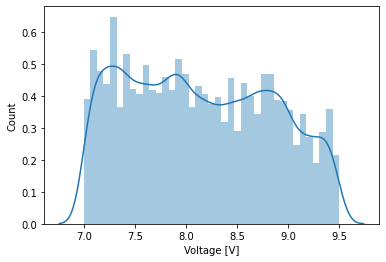

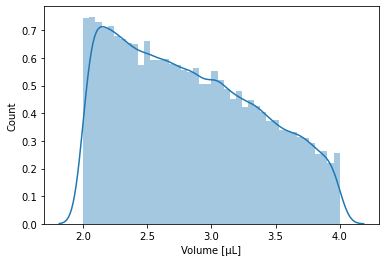

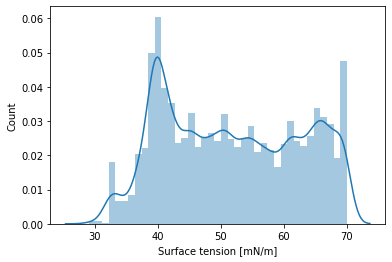

In [15]:
plt.figure()
sns.distplot(dataset['volt'])
plt.xlabel('Voltage [V]')
plt.ylabel('Count')

plt.figure()
sns.distplot(dataset['volume'])
plt.xlabel('Volume [μL]')
plt.ylabel('Count')

plt.figure()
sns.distplot(dataset['st'])
plt.xlabel('Surface tension [mN/m]')
plt.ylabel('Count')

print('Number of instances: %d' %len(dataset))

### Calculate the acoustic pressure from the simple model

In [ ]:
# new_input=np.asarray(dataset)

In [ ]:
# # If no contour points were droped
# n_ST=603
# n_Rsph=602
# rho_i=0
# rho_f=300
# theta_i=300
# theta_f=600

In [ ]:
# from lmfit import Model, fit_report, Parameters

# def model_fit(th, Ps):
#     """
#     Express the model that will be used to fit the experimental data (simple approach).

#     Input parameters
#     ----------
#     dB:     deciBell
#     th:     angle theta
#     Returns
#     -------
#     Expression of fitting model.

#     """
#     rho=-((3/(64*gamma))*R_sph**2*Ps**2*Cg_air*(1+((7/5)*(k_o*R_sph)**2)))*(3*(np.cos(th))**2-1)+R_sph
#     return rho


# data_Ps=[]
# Cg_air=1/101325 #Pa**(-1)
# k_o=2*np.pi*40/340 #mm^-1

# for i in range(len(new_input)):
#   gamma=new_input[i, n_ST]
#   R_sph=new_input[i, n_Rsph]
#   rho=new_input[i, rho_s, rho_e]
#   gmodel = Model(model_fit, nan_policy='omit')
    
#   fit_param = Parameters()
#   fit_param.add('Ps', value=700, min=10, max=4000)
  
#   result = gmodel.fit(rho, th=new_input[i, theta_i:theta_f], params=fit_param)         #rho_final, th: x and y to be evaluated, respectively
#   Ps=result.params['Ps'].value
#   data_Ps.append(Ps)
# data_Ps=np.asarray(data_Ps)

# plt.figure()
# plt.plot(data_Ps)
# plt.xlabel('Image')
# plt.ylabel('Acoustic pressure [Pa]')

#### Check the fitting of the simple model

In [ ]:
# i=100
# plt.figure()
# plt.plot(new_input[i, 300:600], rho, 'bo')
# plt.plot(new_input[i, 300:600], result.best_fit, 'r-', label='best fit')

In [ ]:
# column_names=[]

# for i in range(300):
#   column_names.append('rho_%d' %i)
# for i in range(300):
#   column_names.append('theta_%d' %i)
# column_names.append('volume')
# column_names.append('R_sph')
# column_names.append('volt')
# column_names.append('st')

# new_dataset=pd.DataFrame(new_input, columns=column_names)

In [ ]:
# # #Add the calclulated Ps values to the new_dataset dataframe
# new_dataset['Ps']=data_Ps

# #Drop the features that we don't have in the saved model
# new_dataset.pop('R_sph')
# new_dataset.pop('volt')
# # new_dataset.pop('volume')
# new_dataset.tail()

### Keep Ps values within a specific range

In [ ]:
# newer_input=[]
# Ps_min=1500
# Ps_max=2100
# for i in range(len(new_dataset)):
#   if new_dataset['Ps'].iloc[i] >= Ps_min and new_dataset['Ps'].iloc[i] <= Ps_max:
#     Ps_range=new_dataset.iloc[i, :]
#     newer_input.append(Ps_range)
# newer_input=np.asarray(newer_input)

# newer_input.shape

In [ ]:
# plt.figure()
# plt.plot(newer_input[:, 601])
# plt.ylabel('Acoustic pressure [Pa]')
# plt.xlabel('droplet')

### Store values in new DataFrame

In [ ]:
# column_names=[]

# for i in range(300):
#   column_names.append('rho_%d' %i)
# for i in range(300):
#   column_names.append('theta_%d' %i)
# # column_names.append('volume')
# column_names.append('st')
# column_names.append('Ps')

# new_df=pd.DataFrame(newer_input, columns=column_names)

# #Drop ST:
# new_df.pop('st')

### Drop contour points

In [16]:
# If we want to drop 150 datapoints then n= 299 

# If we want to drop 125 datapoints then n= 250

n=250
for i in range(0, n, 2):
  dataset.pop('theta_%d' %i)

for i in range(0, n, 2):
  dataset.pop('rho_%d' %i)
dataset.tail()

,rho_1,rho_3,rho_5,rho_7,rho_9,rho_11,rho_13,rho_15,rho_17,rho_19,rho_21,rho_23,rho_25,rho_27,rho_29,rho_31,rho_33,rho_35,rho_37,rho_39,rho_41,rho_43,rho_45,rho_47,rho_49,rho_51,rho_53,rho_55,rho_57,rho_59,rho_61,rho_63,rho_65,rho_67,rho_69,rho_71,rho_73,rho_75,rho_77,rho_79,...,theta_263,theta_264,theta_265,theta_266,theta_267,theta_268,theta_269,theta_270,theta_271,theta_272,theta_273,theta_274,theta_275,theta_276,theta_277,theta_278,theta_279,theta_280,theta_281,theta_282,theta_283,theta_284,theta_285,theta_286,theta_287,theta_288,theta_289,theta_290,theta_291,theta_292,theta_293,theta_294,theta_295,theta_296,theta_297,theta_298,theta_299,volume,volt,st
158388,0.853385,0.855246,0.853275,0.850105,0.847184,0.842500,0.839186,0.837036,0.833456,0.831638,0.823699,0.810630,0.796147,0.772962,0.750407,0.730764,0.719040,0.714637,0.706551,0.700624,0.696839,0.691383,0.682780,0.676692,0.673640,0.668719,0.665851,0.665000,0.664533,0.663037,0.659722,0.659733,0.660495,0.659272,0.660228,0.662567,0.662452,0.663185,0.666597,0.670636,...,-0.690004,-0.705801,-0.726823,-0.738382,-0.760936,-0.798280,-0.836729,-0.858366,-0.868963,-0.925489,-0.990233,-1.049659,-1.061792,-1.074999,-1.081581,-1.097966,-1.118439,-1.154495,-1.180730,-1.219292,-1.267181,-1.321066,-1.328864,-1.333320,-1.345544,-1.362652,-1.381882,-1.396108,-1.408070,-1.424427,-1.433691,-1.461601,-1.511379,-1.540645,-1.549577,-1.556282,-1.567446,2.018775,8.070,36.969827
158389,0.856677,0.857462,0.856595,0.856057,0.850100,0.846133,0.839833,0.836538,0.833280,0.828472,0.825571,0.815317,0.800124,0.779063,0.758108,0.740740,0.724369,0.714844,0.705653,0.701517,0.694531,0.690999,0.681901,0.678324,0.669302,0.667205,0.662090,0.661265,0.659627,0.657801,0.658063,0.656561,0.656021,0.656923,0.656095,0.656174,0.658490,0.659176,0.661289,0.664523,...,-0.669916,-0.679504,-0.701531,-0.726591,-0.734101,-0.770057,-0.788654,-0.803356,-0.814308,-0.838257,-0.866251,-0.958286,-1.015497,-1.082762,-1.089302,-1.102281,-1.120530,-1.138527,-1.169931,-1.189639,-1.217550,-1.278370,-1.293682,-1.309083,-1.346563,-1.361359,-1.370693,-1.384833,-1.396868,-1.413208,-1.431729,-1.436797,-1.470885,-1.502385,-1.509059,-1.538437,-1.565243,2.014707,8.110,36.968075
158390,0.854423,0.853681,0.853557,0.852398,0.849945,0.842954,0.835140,0.833081,0.828658,0.824201,0.820014,0.810698,0.803677,0.781810,0.759368,0.738358,0.726102,0.712264,0.703355,0.698484,0.693683,0.688828,0.684752,0.677005,0.670297,0.668017,0.664071,0.661721,0.658898,0.658752,0.659188,0.656784,0.657328,0.657526,0.658962,0.658003,0.662112,0.662046,0.664487,0.667237,...,-0.702355,-0.721924,-0.742633,-0.757719,-0.772623,-0.783767,-0.824641,-0.851682,-0.864268,-0.888991,-0.906342,-0.952091,-1.014602,-1.031422,-1.061835,-1.127834,-1.139569,-1.162865,-1.191177,-1.205556,-1.232398,-1.281501,-1.309882,-1.322751,-1.337216,-1.380680,-1.392682,-1.406540,-1.411743,-1.430294,-1.444303,-1.457918,-1.485521,-1.519373,-1.530537,-1.537250,-1.564085,2.006503,8.185,36.964529
158391,0.855732,0.854696,0.853448,0.851738,0.843921,0.842533,0.841453,0.834859,0.832089,0.830398,0.813485,0.807377,0.783953,0.759639,0.738060,0.731714,0.714910,0.710404,0.704074,0.699043,0.693125,0.687959,0.675371,0.673936,0.668136,0.664438,0.661075,0.658483,0.658555,0.655377,0.653983,0.654382,0.653911,0.655240,0.656764,0.656605,0.658764,0.658165,0.660711,0.662768,...,-0.675170,-0.692862,-0.704567,-0.716204,-0.786333,-0.810387,-0.828705,-0.841460,-0.852212,-0.919673,-1.032274,-1.052408,-1.059071,-1.078909,-1.097419,-1.128590,-1.181280,-1.203204,-1.230916,-1.304034,-1.314110,-1.319141,-1.324144,-1.343572,-1.357951,-1.382098,-1.386977,-1.406021,-1.419775,-1.424589,-1.475145,-1.524960,-1.533983,-1.542902,-1.547363,-1.560767,-1.565221,2.003076,8.220,36.963046
158393,0.855736,0.856598,0.857376,0.854719,0.852184,0.847979,0.844240,0.836479,0.833171,0.831757,0.826059,0.815378,0.808852,0.788482,0.771742,0.749250,0.732030,0.715707,0.708049,0.699208,0.693580,0.688432,0.683379,0.676274,0.671124,0.662625,0.660668,0.655959,0.655289,0.6

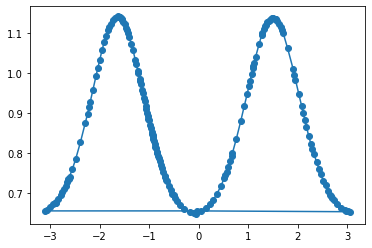

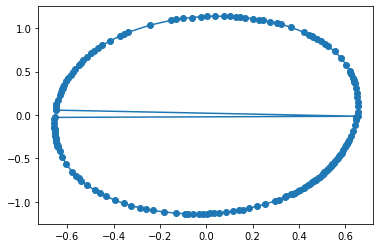

In [17]:
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

#Check that the drop contour is still well defined!

# For 150 contour datapoints:
# plt.figure()
# plt.plot(dataset.iloc[600, 150:300], dataset.iloc[600, 0:150])

# x, y=pol2cart(dataset.iloc[n, 0:150].values, dataset.iloc[n, 150:300].values)

# plt.figure()
# plt.plot(x, y, '-o')

############################################################################################

# For 175 contour datapoints:
n=2100
plt.figure()
plt.plot(dataset.iloc[n, 175:350], dataset.iloc[n, 0:175], '-o')

x, y=pol2cart(dataset.iloc[n, 0:175].values, dataset.iloc[n, 175:350].values)

plt.figure()
plt.plot(x, y, '-o')

### Test saved model

In [ ]:
# Shuffle instances
dataset=dataset.sample(frac=1)
dataset.tail()

In [18]:
#Save the ST values separately
ST_values=np.asarray(dataset.st)
ST_values

array([69.40262556, 69.39711403, 69.39495563, ..., 36.96452889,
       36.96304597, 36.9622293 ])

In [19]:
# Copy the dataset
n_dataset=dataset.copy()

# Remove the ST from the dataframe
n_dataset.pop('st')

# Calculate statistics
stats_input_df=n_dataset.describe()
stats_input_df=stats_input_df.transpose()
stats_input_df.tail()

,count,mean,std,min,25%,50%,75%,max
theta_297,51765.0,-1.523533,0.023114,-1.562844,-1.542820,-1.529296,-1.506680,-1.397454
theta_298,51765.0,-1.536969,0.021074,-1.567263,-1.554176,-1.543020,-1.522583,-1.449636
theta_299,51765.0,-1.556796,0.011580,-1.570796,-1.565677,-1.560159,-1.550262,-1.469733
volume,51765.0,2.826983,0.546590,2.000027,2.351057,2.764955,3.249984,3.999960
volt,51765.0,8.138342,0.701728,7.000000,7.520000,8.090000,8.740000,9.500000


### Normalize the input features

### Min-Max normalization

In [20]:
def min_max_norm(x):
  return (x-stats_input_df['min'])/(stats_input_df['max']-stats_input_df['min'])

norm_input_array=min_max_norm(n_dataset)


### Standard normalization

In [ ]:
def std_norm(x):
  return (x - stats_input_df['mean']) / stats_input_df['std']

norm_input_array=std_norm(n_dataset)


### Test the saved model on the input features

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 50)                17650     
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 255       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 6         
Total params: 17,911
Trainable params: 17,911
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


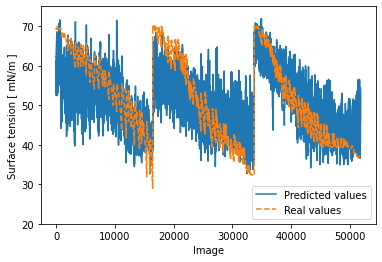

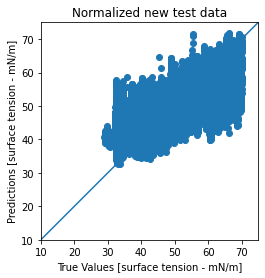

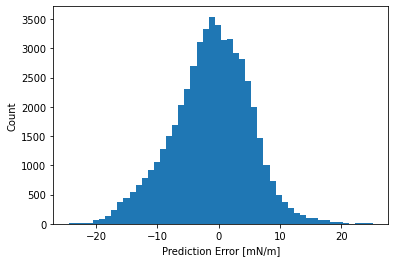

In [23]:
#Import model from drive
folder=str('theory_experiment_mix/')
filename=str('model_train_4_1_all_surf_2_4_uL_7_9_V_25_72_ST.h5')
# folder=str('theoretical_all_vary/')
# filename=str('model_all_vary_with_Ps_noise_Ps_1000_2500_2_5μL_25_72mN_m_with_noise_train4_1.h5') #
model = tf.keras.models.load_model('/content/drive/My Drive/DropLev/MachineLearningModels/'+folder+filename)
model.summary()

prediction=model.predict(norm_input_array).flatten()
true_values=ST_values

plt.figure()
plt.xlabel('Image')
plt.ylabel('Surface tension [ mN/m ]')
plt.ylim(20, 75)
plt.plot(prediction, label='Predicted values')
plt.plot(true_values, '--', label='Real values')
plt.legend()

plt.figure()
plt.scatter(true_values, prediction)
plt.title('Normalized new test data')
plt.xlabel('True Values [surface tension - mN/m]')
plt.ylabel('Predictions [surface tension - mN/m]')
plt.axis('equal')
plt.axis('square')
plt.xlim([10,75])
plt.ylim([10,75])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

error = prediction - true_values
plt.figure()
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error [mN/m]")
_ = plt.ylabel("Count")
#plt.ylim(0, 30)
plt.show()


### Split the data into train and test

Now split the dataset into a training set and a test set.

We will use the test set in the final evaluation of our model.

In [24]:
train_dataset = dataset.sample(frac=0.8,random_state=1)
test_dataset = dataset.drop(train_dataset.index)

Also look at the overall statistics:

In [25]:
train_stats = train_dataset.describe()
train_stats.pop("st")

train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
rho_1,41412.0,0.963393,0.071908,0.814681,0.905363,0.956769,1.015195,1.252538
rho_3,41412.0,0.963490,0.072062,0.815905,0.905375,0.956793,1.015466,1.253391
rho_5,41412.0,0.962756,0.072056,0.813031,0.904760,0.955712,1.014805,1.251621
rho_7,41412.0,0.960924,0.072168,0.813721,0.902712,0.953260,1.013363,1.249997
rho_9,41412.0,0.957918,0.072395,0.810748,0.899582,0.949819,1.010826,1.247434
...,...,...,...,...,...,...,...,...
theta_297,41412.0,-1.523492,0.023139,-1.562844,-1.542837,-1.529180,-1.506579,-1.397454
theta_298,41412.0,-1.536921,0.021102,-1.567263,-1.554150,-1.543026,-1.522459,-1.449636
theta_299,41412.0,-1.556767,0.011576,-1.570796,-1.565659,-1.560113,-1.550213,-1.469733
volume,41412.0,2.825253,0.546370,2.000027,2.348918,2.763022,3.246181,3.999956


### Split features from labels

Separate the target value, or "label", from the features. This label is the value that you will train the model to predict.

In [26]:
train_labels = train_dataset.pop('st')
test_labels = test_dataset.pop('st')

### Normalize the data

Look again at the `train_stats` block above and note how different the ranges of each feature are.

### Min-Max normalization

In [27]:
def min_max_norm(x):
  return (x-train_stats['min'])/(train_stats['max']-train_stats['min'])

normed_train_data = min_max_norm(train_dataset)
normed_test_data  = min_max_norm(test_dataset)


### Standard normalization

In [ ]:
def std_norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = std_norm(train_dataset)
normed_test_data  = std_norm(test_dataset)


In [ ]:
# #Check pre normalization and after normalization
# first = np.array(train_dataset[:1])
# with np.printoptions(precision=2, suppress=True):
#   print('First example:', first)
#   print('Normalized:', normed_train_data[:1])

## The model

In [ ]:
from tensorflow.keras.models import load_model

del model 
folder=str('theory_experiment_mix/')
model_name=str('All_surf_all_vary_175points_trial_1.h5')


model = load_model(str("/content/drive/My Drive/DropLev/MachineLearningModels/"+folder+model_name))


### Train the model

Train the model for 1000 epochs, and record the training and validation accuracy in the `history` object.

In [28]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 55 == 0: print('')
    print('.', end='')
    


EPOCHS = 1000


early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0, patience=20, verbose=0)


history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[early_stop, PrintDot()])  # callbacks=callbacks_list

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '



.......................................................
.......................................................
.......................................................
....

Visualize the model's training progress using the stats stored in the `history` object.

In [29]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
164,27.588534,3.990277,27.214788,28.569911,4.095786,28.194626,164
165,27.450583,3.980342,27.076342,28.253413,4.097785,27.878843,165
166,27.521233,3.985157,27.145599,27.346680,3.939290,26.972246,166
167,27.332442,3.971097,26.958605,27.890796,4.023625,27.515404,167
168,27.478549,3.979424,27.102369,30.012279,4.108549,29.636978,168


Let's automatically stop training when the validation score doesn't improve. We'll use an *EarlyStopping callback* that tests a training condition for  every epoch. If a set amount of epochs elapses without showing improvement, then automatically stop the training.

You can learn more about this callback [here](https://www.tensorflow.org/versions/master/api_docs/python/tf/keras/callbacks/EarlyStopping).

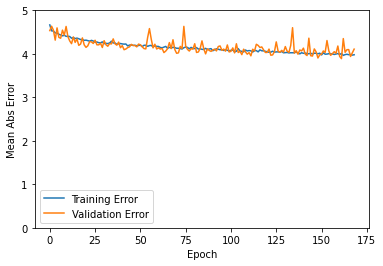

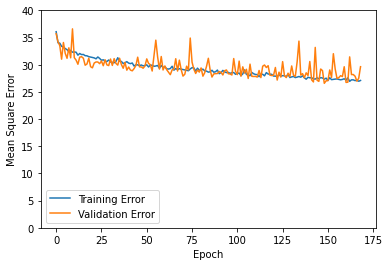

In [30]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Training Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Validation Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Training Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Validation Error')
  plt.ylim([0,40])
  plt.legend()
  plt.show()


plot_history(history)

Let's see how well the model generalizes by using the **test** set, which we did not use when training the model.  This tells us how well we can expect the model to predict when we use it in the real world.

In [31]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: {:5.2f} mN/m".format(mae))
# keras.metrics.accuracy(normed_test_data, test_labels)

Testing set Mean Abs Error:  4.18 mN/m


### Make predictions

Finally, predict volume values using data in the testing set:

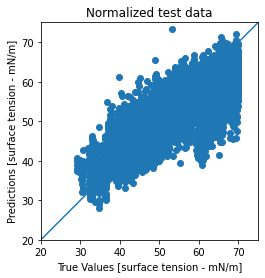

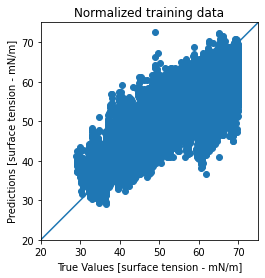

In [32]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.title('Normalized test data')
plt.xlabel('True Values [surface tension - mN/m]')
plt.ylabel('Predictions [surface tension - mN/m]')
plt.axis('equal')
plt.axis('square')
plt.xlim([20,75])
plt.ylim([20,75])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()

test_predictions2 = model.predict(normed_train_data).flatten()

plt.scatter(train_labels, test_predictions2)
plt.title('Normalized training data')
plt.xlabel('True Values [surface tension - mN/m]')
plt.ylabel('Predictions [surface tension - mN/m]')
plt.axis('equal')
plt.axis('square')
plt.xlim([20,75])
plt.ylim([20,75])
_ = plt.plot([-100, 100], [-100, 100])
plt.show()


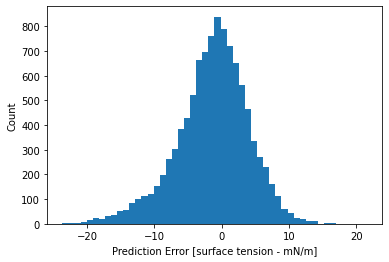

In [33]:
error = test_predictions - test_labels
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error [surface tension - mN/m]")
_ = plt.ylabel("Count")
# plt.xlim(-20, 20)
plt.show()

# Saving the final Model

When you are satisfied with the model and the accuracy continue from here:

Saving the model in a **SavedModel** format

In [ ]:
!pip install -q pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
import os

In [ ]:
# Save the entire model as a SavedModel.
folder=str('theory_experiment_mix/')
filename=str('model_train_4_1_all_exp_data_2_4_uL_7_9_V_25_72_ST_2.h5')
!mkdir -p '/content/drive/My Drive/DropLev/MachineLearningModels' #Ceates a folder named "MachineLearningModels"
model.save('/content/drive/My Drive/DropLev/MachineLearningModels/'+folder+filename)  #Saves the file

The SavedModel format is a directory containing a protobuf binary and a Tensorflow checkpoint. Inspect the saved model directory:

In [ ]:
# DropLev_st_prediction_model directory
#!ls content/drive/My Drive/DropLev/MachineLearningModels

# Contains an assets folder, saved_model.pb, and variables folder.
#!ls content/drive/My Drive/DropLev/MachineLearningModels/SDS_1.h5

Saving the model in a **HDF5** format

In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
#model.save('content/drive/My Drive/DropLev/MachineLearningModels/'+filename) 